In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [8]:
tickers = ["TSLA", "BND", "SPY"]
start_date = "2015-01-01"
end_date = "2024-10-31"

In [9]:
data = yf.download(tickers, start=start_date, end=end_date)

[*********************100%***********************]  3 of 3 completed


In [10]:
data

Price                      Adj Close                              Close  \
Ticker                           BND         SPY        TSLA        BND   
Date                                                                      
2015-01-02 00:00:00+00:00  63.172371  173.173813   14.620667  82.650002   
2015-01-05 00:00:00+00:00  63.355755  170.046326   14.006000  82.889999   
2015-01-06 00:00:00+00:00  63.539234  168.444626   14.085333  83.129997   
2015-01-07 00:00:00+00:00  63.577419  170.543655   14.063333  83.180000   
2015-01-08 00:00:00+00:00  63.478088  173.569977   14.041333  83.050003   
...                              ...         ...         ...        ...   
2024-10-24 00:00:00+00:00  73.081184  579.239990  260.480011  73.309998   
2024-10-25 00:00:00+00:00  72.931664  579.039978  269.190002  73.160004   
2024-10-28 00:00:00+00:00  72.841942  580.830017  262.510010  73.070000   
2024-10-29 00:00:00+00:00  72.901749  581.770020  259.519989  73.129997   
2024-10-30 00:00:00+00:00  72.831970  580.010010  257.549988  73.059998   

Price                                                   High              \
Ticker                            SPY        TSLA        BND         SPY   
Date                                                                       
2015-01-02 00:00:00+00:00  205.429993   14.620667  82.690002  206.880005   
2015-01-05 00:00:00+00:00  201.720001   14.006000  82.919998  204.369995   
2015-01-06 00:00:00+00:00  199.820007   14.085333  83.379997  202.720001   
2015-01-07 00:00:00+00:00  202.309998   14.063333  83.279999  202.720001   
2015-01-08 00:00:00+00:00  205.899994   14.041333  83.110001  206.160004   
...                               ...         ...        ...         ...   
2024-10-24 00:00:00+00:00  579.239990  260.480011  73.440002  580.059998   
2024-10-25 00:00:00+00:00  579.039978  269.190002  73.480003  584.460022   
2024-10-28 00:00:00+00:00  580.830017  262.510010  73.279999  582.710022   
2024-10-29 00:00:00+00:00  581.770020  259.519989  73.139999  582.909973   
2024-10-30 00:00:00+00:00  580.010010  257.549988  73.430000  583.320007   

Price                                        Low                          \
Ticker                           TSLA        BND         SPY        TSLA   
Date                                                                       
2015-01-02 00:00:00+00:00   14.883333  82.419998  204.179993   14.217333   
2015-01-05 00:00:00+00:00   14.433333  82.699997  201.350006   13.810667   
2015-01-06 00:00:00+00:00   14.280000  83.029999  198.860001   13.614000   
2015-01-07 00:00:00+00:00   14.318667  83.050003  200.880005   13.985333   
2015-01-08 00:00:00+00:00   14.253333  82.970001  203.990005   14.000667   
...                               ...        ...         ...         ...   
2024-10-24 00:00:00+00:00  262.119995  73.169998  576.570007  242.649994   
2024-10-25 00:00:00+00:00  269.489990  73.129997  578.080017  255.320007   
2024-10-28 00:00:00+00:00  273.540009  72.949997  580.520020  262.239990   
2024-10-29 00:00:00+00:00  264.980011  72.790001  578.429993  255.509995   
2024-10-30 00:00:00+00:00  263.350006  73.019997  579.289978  255.820007   

Price                           Open                           Volume  \
Ticker                           BND         SPY        TSLA      BND   
Date                                                                    
2015-01-02 00:00:00+00:00  82.430000  206.380005   14.858000  2218800   
2015-01-05 00:00:00+00:00  82.739998  204.169998   14.303333  5820100   
2015-01-06 00:00:00+00:00  83.029999  202.089996   14.004000  3887600   
2015-01-07 00:00:00+00:00  83.139999  201.419998   14.223333  2433400   
2015-01-08 00:00:00+00:00  83.110001  204.009995   14.187333  1873400   
...                              ...         ...         ...      ...   
2024-10-24 00:00:00+00:00  73.279999  579.979980  244.679993  6219500   
2024-10-25 00:00:00+00:00  73.480003  581.510010  256.010010  4641400   
2024-10-28 00:00

In [11]:
data.head()

Price                      Adj Close                             Close  \
Ticker                           BND         SPY       TSLA        BND   
Date                                                                     
2015-01-02 00:00:00+00:00  63.172371  173.173813  14.620667  82.650002   
2015-01-05 00:00:00+00:00  63.355755  170.046326  14.006000  82.889999   
2015-01-06 00:00:00+00:00  63.539234  168.444626  14.085333  83.129997   
2015-01-07 00:00:00+00:00  63.577419  170.543655  14.063333  83.180000   
2015-01-08 00:00:00+00:00  63.478088  173.569977  14.041333  83.050003   

Price                                                  High              \
Ticker                            SPY       TSLA        BND         SPY   
Date                                                                      
2015-01-02 00:00:00+00:00  205.429993  14.620667  82.690002  206.880005   
2015-01-05 00:00:00+00:00  201.720001  14.006000  82.919998  204.369995   
2015-01-06 00:00:00+00:00  199.820007  14.085333  83.379997  202.720001   
2015-01-07 00:00:00+00:00  202.309998  14.063333  83.279999  202.720001   
2015-01-08 00:00:00+00:00  205.899994  14.041333  83.110001  206.160004   

Price                                       Low                         \
Ticker                          TSLA        BND         SPY       TSLA   
Date                                                                     
2015-01-02 00:00:00+00:00  14.883333  82.419998  204.179993  14.217333   
2015-01-05 00:00:00+00:00  14.433333  82.699997  201.350006  13.810667   
2015-01-06 00:00:00+00:00  14.280000  83.029999  198.860001  13.614000   
2015-01-07 00:00:00+00:00  14.318667  83.050003  200.880005  13.985333   
2015-01-08 00:00:00+00:00  14.253333  82.970001  203.990005  14.000667   

Price                           Open                          Volume  \
Ticker                           BND         SPY       TSLA      BND   
Date                                                                   
2015-01-02 00:00:00+00:00  82.430000  206.380005  14.858000  2218800   
2015-01-05 00:00:00+00:00  82.739998  204.169998  14.303333  5820100   
2015-01-06 00:00:00+00:00  83.029999  202.089996  14.004000  3887600   
2015-01-07 00:00:00+00:00  83.139999  201.419998  14.223333  2433400   
2015-01-08 00:00:00+00:00  83.110001  204.009995  14.187333  1873400   

Price                                           
Ticker                           SPY      TSLA  
Date                                            
2015-01-02 00:00:00+00:00  121465900  71466000  
2015-01-05 00:00:00+00:00  169632600  80527500  
2015-01-06 00:00:00+00:00  209151400  93928500  
2015-01-07 00:00:00+00:00  125346700  44526000  
2015-01-08 00:00:00+00:00  147217800  51637500

In [12]:
data.describe()

Price     Adj Close                                  Close               \
Ticker          BND          SPY         TSLA          BND          SPY   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean      69.884952   310.253155   111.438965    80.316039   330.623634   
std        4.876945   111.250656   110.120450     5.097592   103.324179   
min       62.453293   157.328568     9.578000    68.040001   182.860001   
25%       66.118977   214.822323    17.066167    76.379997   242.130001   
50%       68.686272   275.812317    25.043000    81.410004   298.089996   
75%       73.604704   402.297516   216.865002    84.010002   416.212502   
max       79.578102   584.590027   409.970001    89.480003   584.590027   

Price                       High                                    Low  \
Ticker         TSLA          BND          SPY         TSLA          BND   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean     111.438965    80.431152   332.368856   113.895836    80.198464   
std      110.120450     5.082268   103.840765   112.643277     5.113232   
min        9.578000    68.379997   184.100006    10.331333    67.989998   
25%       17.066167    76.674999   243.380005    17.368167    76.265001   
50%       25.043000    81.519997   299.324997    25.279000    81.300003   
75%      216.865002    84.167500   418.242500   221.910004    83.937502   
max      409.970001    89.589996   586.119995   414.496674    89.440002   

Price                                    Open                            \
Ticker          SPY         TSLA          BND          SPY         TSLA   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean     328.614426   108.869421    80.319968   330.570376   111.461872   
std      102.719137   107.541830     5.100419   103.311248   110.208156   
min      181.020004     9.403333    68.080002   182.339996     9.488000   
25%      240.692501    16.790167    76.502501   242.302498    17.058499   
50%      296.804993    24.462334    81.410004   298.095001    24.986667   
75%      413.687500   212.084999    84.047503   416.240005   217.264999   
max      582.580017   405.666656    89.550003   585.909973   411.470001   

Price         Volume                              
Ticker           BND           SPY          TSLA  
count   2.474000e+03  2.474000e+03  2.474000e+03  
mean    4.169014e+06  8.810268e+07  1.125745e+08  
std     2.778389e+06  4.491678e+07  7.449619e+07  
min     0.000000e+00  2.027000e+07  1.062000e+07  
25%     2.024900e+06  5.960170e+07  6.682590e+07  
50%     3.710900e+06  7.696935e+07  9.289395e+07  
75%     5.519825e+06  1.027178e+08  1.301899e+08  
max     3.193720e+07  5.072443e+08  9.140820e+08

In [13]:
data.columns

MultiIndex([('Adj Close',  'BND'),
            ('Adj Close',  'SPY'),
            ('Adj Close', 'TSLA'),
            (    'Close',  'BND'),
            (    'Close',  'SPY'),
            (    'Close', 'TSLA'),
            (     'High',  'BND'),
            (     'High',  'SPY'),
            (     'High', 'TSLA'),
            (      'Low',  'BND'),
            (      'Low',  'SPY'),
            (      'Low', 'TSLA'),
            (     'Open',  'BND'),
            (     'Open',  'SPY'),
            (     'Open', 'TSLA'),
            (   'Volume',  'BND'),
            (   'Volume',  'SPY'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2474 entries, 2015-01-02 00:00:00+00:00 to 2024-10-30 00:00:00+00:00
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, BND)   2474 non-null   float64
 1   (Adj Close, SPY)   2474 non-null   float64
 2   (Adj Close, TSLA)  2474 non-null   float64
 3   (Close, BND)       2474 non-null   float64
 4   (Close, SPY)       2474 non-null   float64
 5   (Close, TSLA)      2474 non-null   float64
 6   (High, BND)        2474 non-null   float64
 7   (High, SPY)        2474 non-null   float64
 8   (High, TSLA)       2474 non-null   float64
 9   (Low, BND)         2474 non-null   float64
 10  (Low, SPY)         2474 non-null   float64
 11  (Low, TSLA)        2474 non-null   float64
 12  (Open, BND)        2474 non-null   float64
 13  (Open, SPY)        2474 non-null   float64
 14  (Open, TSLA)       2474 non-null   float64
 15  (Volume, BND)      2474 

Separate data for each ticker


In [10]:
tsla_df = yf.download('TSLA', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [11]:
bnd_df = yf.download('BND', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [12]:
spy_df = yf.download('SPY', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [13]:
tsla_df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


In [14]:
bnd_df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BND,BND,BND,BND,BND,BND
Date,,,,,,
2015-01-02 00:00:00+00:00,63.172337,82.650002,82.690002,82.419998,82.430000,2218800
2015-01-05 00:00:00+00:00,63.355782,82.889999,82.919998,82.699997,82.739998,5820100
2015-01-06 00:00:00+00:00,63.539230,83.129997,83.379997,83.029999,83.029999,3887600
2015-01-07 00:00:00+00:00,63.577419,83.180000,83.279999,83.050003,83.139999,2433400
2015-01-08 00:00:00+00:00,63.478069,83.050003,83.110001,82.970001,83.110001,1873400


In [15]:
spy_df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2015-01-02 00:00:00+00:00,173.173798,205.429993,206.880005,204.179993,206.380005,121465900
2015-01-05 00:00:00+00:00,170.046249,201.720001,204.369995,201.350006,204.169998,169632600
2015-01-06 00:00:00+00:00,168.444626,199.820007,202.720001,198.860001,202.089996,209151400
2015-01-07 00:00:00+00:00,170.543655,202.309998,202.720001,200.880005,201.419998,125346700
2015-01-08 00:00:00+00:00,173.569977,205.899994,206.160004,203.990005,204.009995,147217800


In [16]:


# Calculate daily returns
tsla_df['Daily_Return'] = tsla_df['Adj Close'].pct_change()
bnd_df['Daily_Return'] = bnd_df['Adj Close'].pct_change()
spy_df['Daily_Return'] = spy_df['Adj Close'].pct_change()

# Calculate volatility
tsla_df['Volatility'] = tsla_df['Daily_Return'].rolling(window=21).std() * np.sqrt(252)
bnd_df['Volatility'] = bnd_df['Daily_Return'].rolling(window=21).std() * np.sqrt(252)
spy_df['Volatility'] = spy_df['Daily_Return'].rolling(window=21).std() * np.sqrt(252)

In [17]:
print(tsla_df['Daily_Return'] )
print(bnd_df['Daily_Return'] )
print(spy_df['Daily_Return'] )

Date
2015-01-02 00:00:00+00:00         NaN
2015-01-05 00:00:00+00:00   -0.042041
2015-01-06 00:00:00+00:00    0.005664
2015-01-07 00:00:00+00:00   -0.001562
2015-01-08 00:00:00+00:00   -0.001564
                               ...   
2024-10-24 00:00:00+00:00    0.219190
2024-10-25 00:00:00+00:00    0.033438
2024-10-28 00:00:00+00:00   -0.024815
2024-10-29 00:00:00+00:00   -0.011390
2024-10-30 00:00:00+00:00   -0.007591
Name: Daily_Return, Length: 2474, dtype: float64
Date
2015-01-02 00:00:00+00:00         NaN
2015-01-05 00:00:00+00:00    0.002904
2015-01-06 00:00:00+00:00    0.002896
2015-01-07 00:00:00+00:00    0.000601
2015-01-08 00:00:00+00:00   -0.001563
                               ...   
2024-10-24 00:00:00+00:00    0.001640
2024-10-25 00:00:00+00:00   -0.002046
2024-10-28 00:00:00+00:00   -0.001230
2024-10-29 00:00:00+00:00    0.000821
2024-10-30 00:00:00+00:00   -0.000957
Name: Daily_Return, Length: 2474, dtype: float64
Date
2015-01-02 00:00:00+00:00         NaN
2015-01-05 00

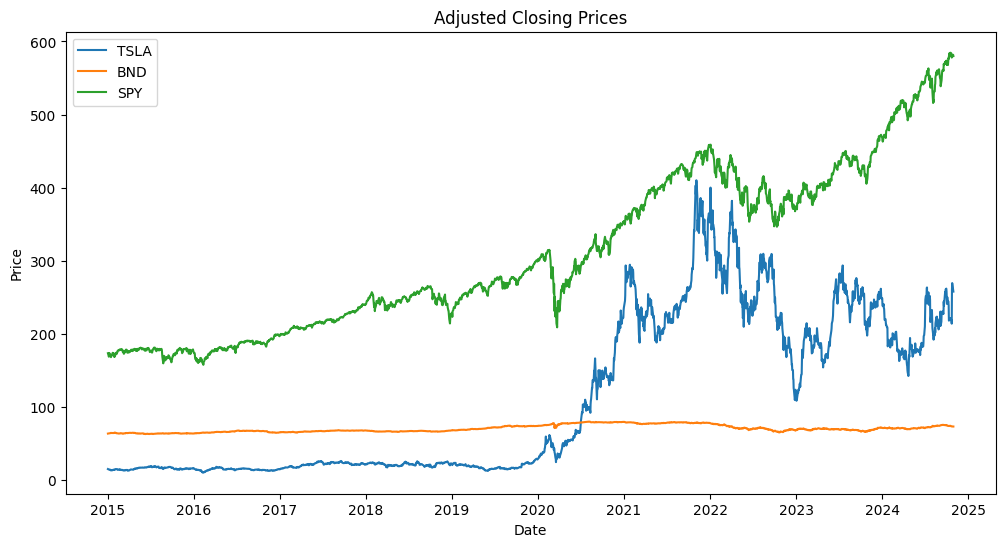

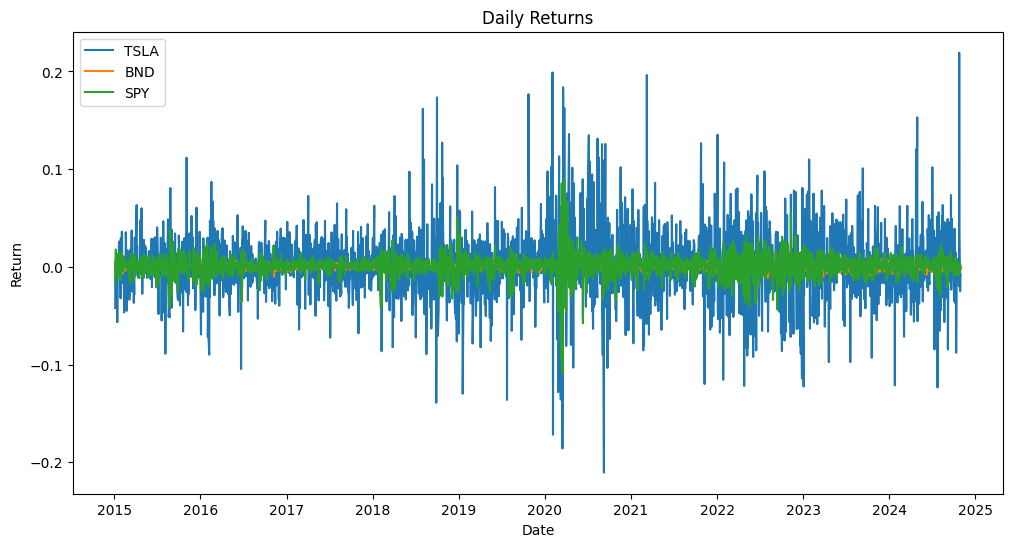

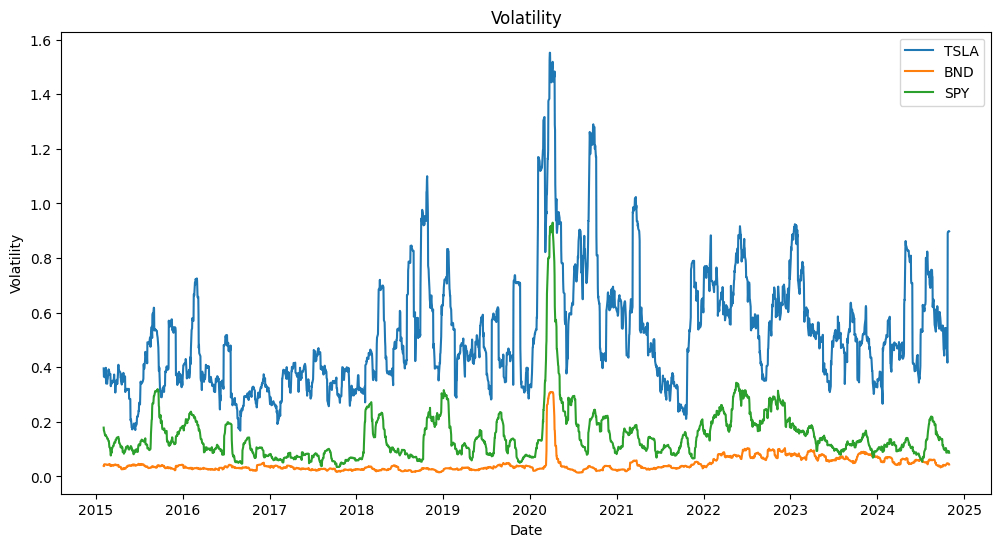

In [18]:
# Plot adjusted closing prices
plt.figure(figsize=(12, 6))
plt.plot(tsla_df['Adj Close'], label='TSLA')
plt.plot(bnd_df['Adj Close'], label='BND')
plt.plot(spy_df['Adj Close'], label='SPY')
plt.title('Adjusted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(tsla_df['Daily_Return'], label='TSLA')
plt.plot(bnd_df['Daily_Return'], label='BND')
plt.plot(spy_df['Daily_Return'], label='SPY')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(tsla_df['Volatility'], label='TSLA')
plt.plot(bnd_df['Volatility'], label='BND')
plt.plot(spy_df['Volatility'], label='SPY')
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [17]:
data = pd.DataFrame()
for ticker in tickers:
    stock = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
    data[ticker] = stock

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [18]:
def plot_decomposition(data, ticker):
    # Perform decomposition
    decomposition = seasonal_decompose(data[ticker], period=21)

    # Plot components
    fig, axes = plt.subplots(4, 1, figsize=(15, 12))

    # Original
    decomposition.observed.plot(ax=axes[0])
    axes[0].set_title(f'{ticker} Time Series Decomposition')
    axes[0].set_ylabel('Observed')

    # Trend
    decomposition.trend.plot(ax=axes[1])
    axes[1].set_ylabel('Trend')

    # Seasonal
    decomposition.seasonal.plot(ax=axes[2])
    axes[2].set_ylabel('Seasonal')

    # Residual
    decomposition.resid.plot(ax=axes[3])
    axes[3].set_ylabel('Residual')

    plt.tight_layout()
    plt.show()

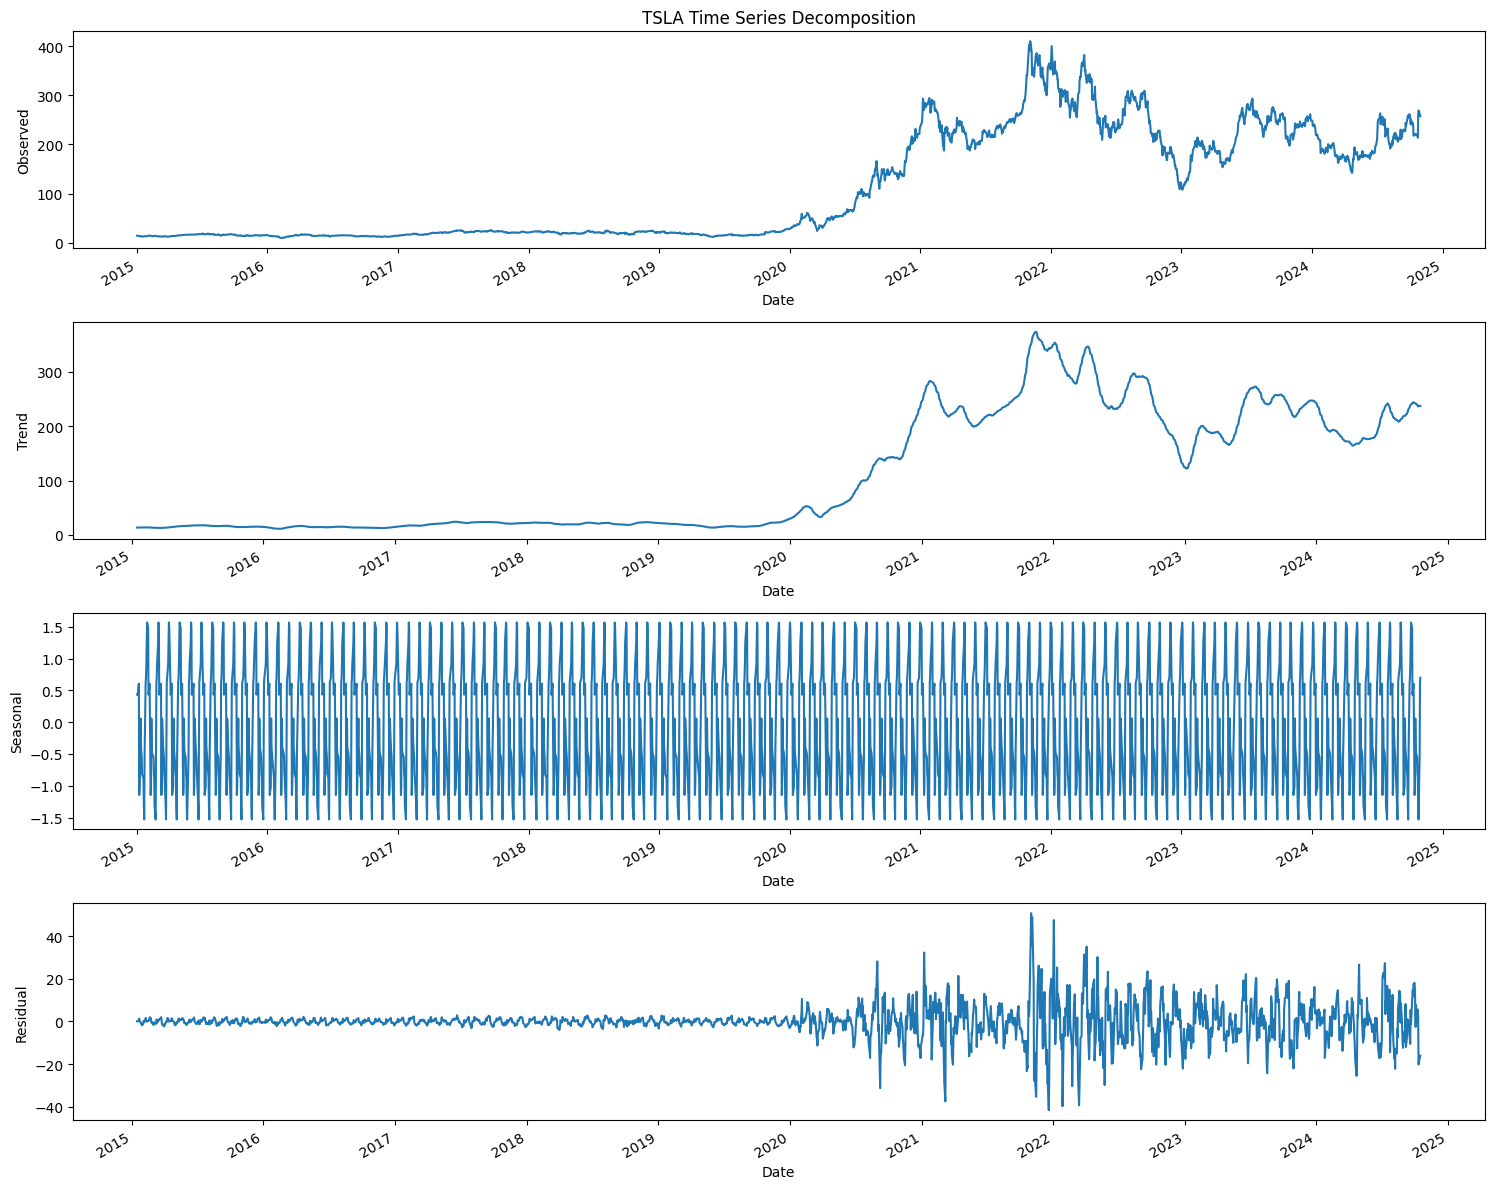

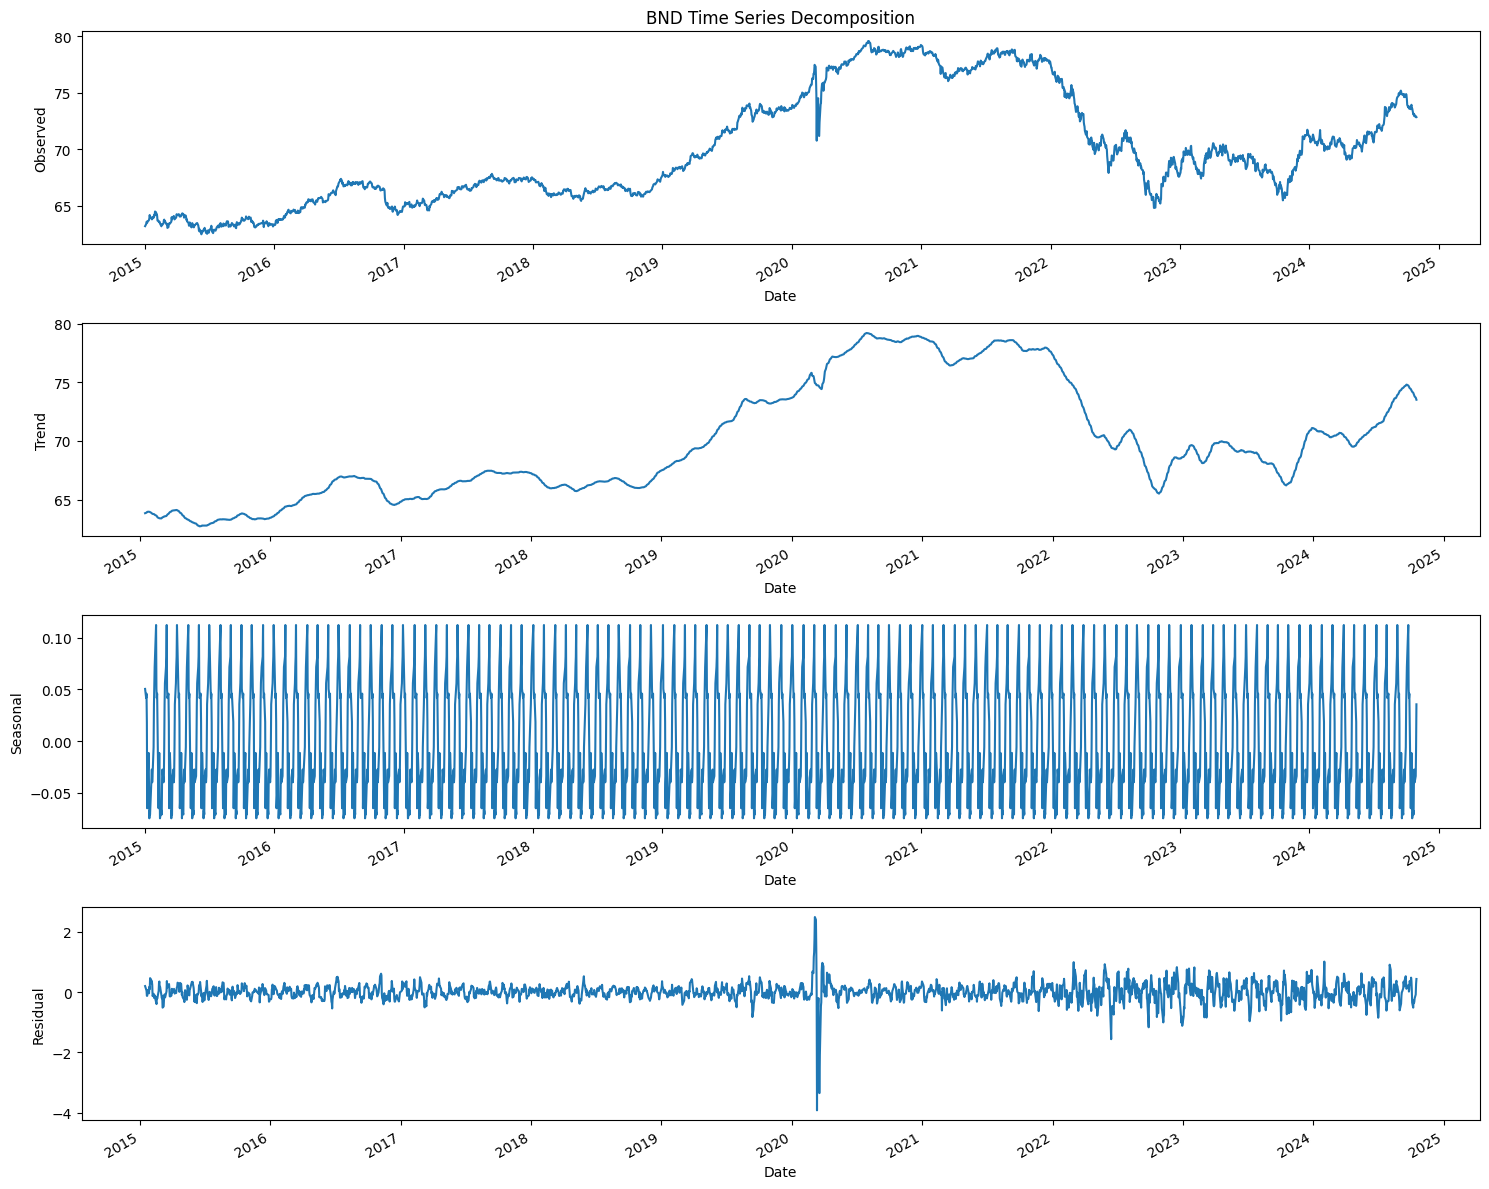

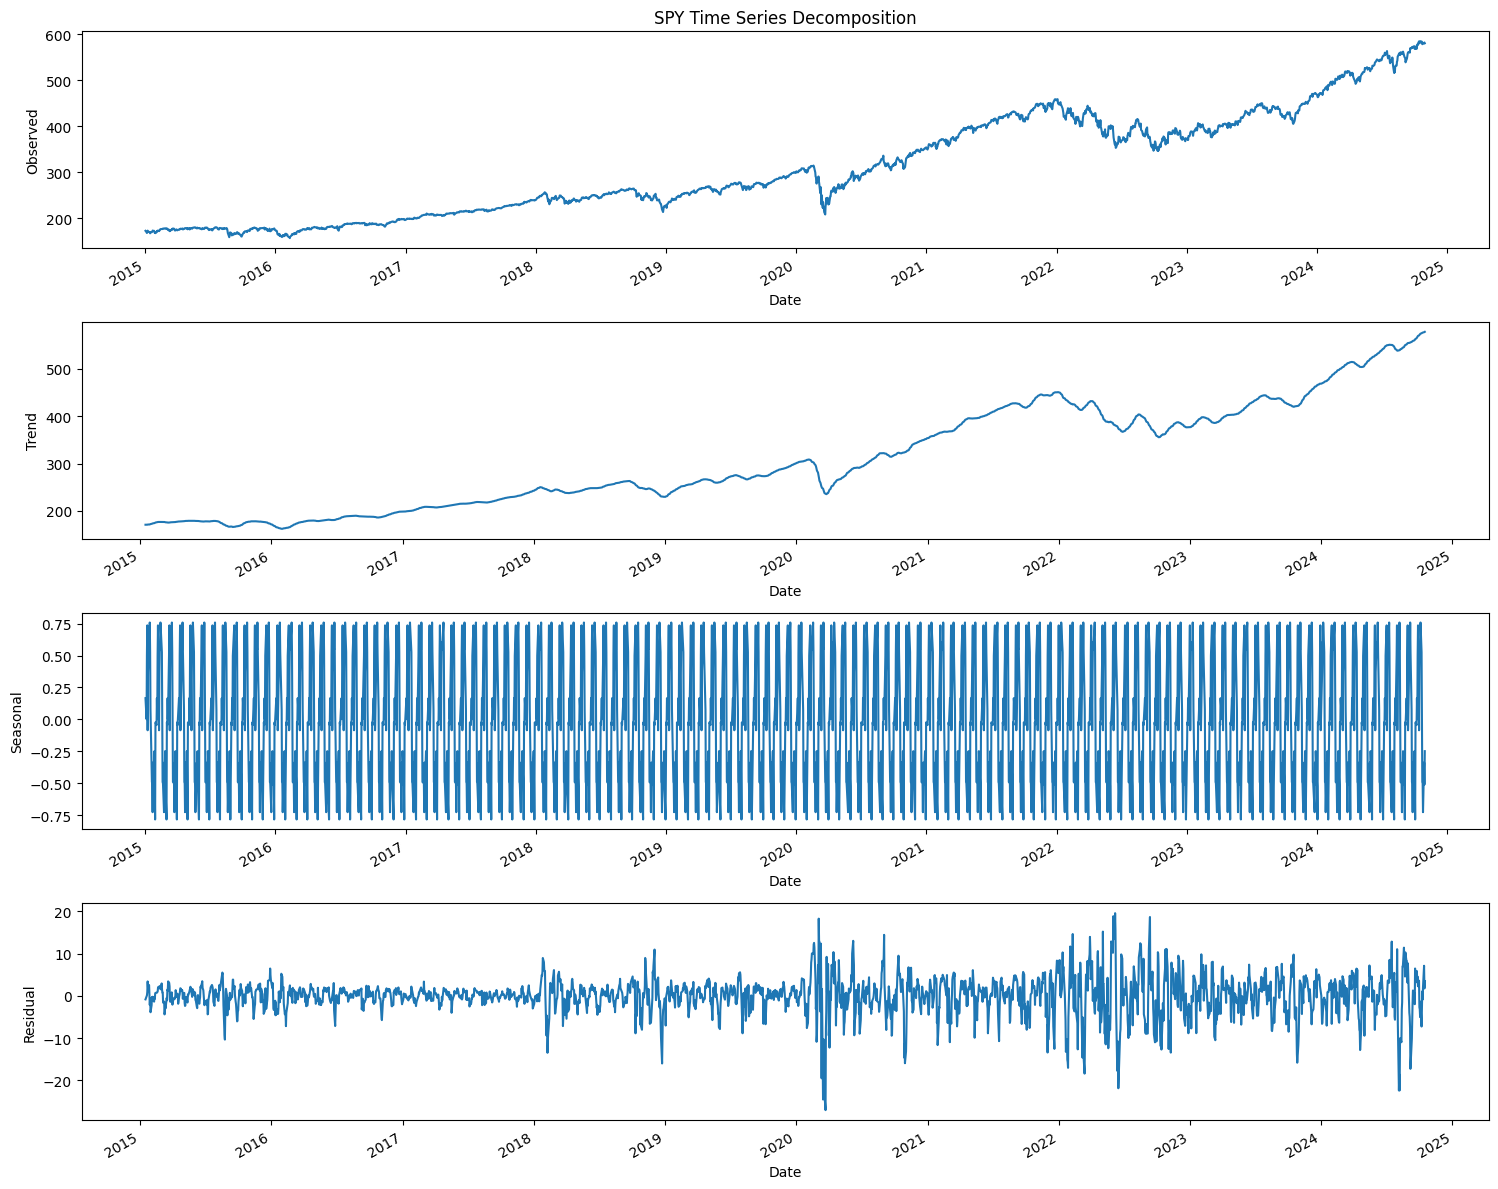

In [19]:
for ticker in tickers:
    plot_decomposition(data, ticker)